# !pip install missingno # only used for this shouldn't be in requirements
# !pip install pingouin

In [3]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg # gives confidence intervals with estimates
import seaborn as sns

sys.path.append("..")
from src.make_data import  add_metrics


sys.tracebacklimit = 0 # easier to see problems
plt.rcParams["figure.figsize"] = (12, 8)

In [14]:
df = pd.read_csv("..//data/raw/the_zebra_movie_data.csv")
print(df.shape)

df = add_metrics(df)  

(5043, 26)
shape - (5043, 30), columns added - ['lift', 'budget_log', 'gross_log', 'decade']


## Correlations

In [6]:
pg.pairwise_corr(df, columns=[])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,num_critic_reviews,duration,pearson,two-sided,4982,0.258486,"[0.23, 0.28]",7.235986e-77,9.988e+72,1.000000
1,num_critic_reviews,director_facebook_likes,pearson,two-sided,4006,0.228096,"[0.2, 0.26]",1.929223e-48,5.354e+44,1.000000
2,num_critic_reviews,actor_3_facebook_likes,pearson,two-sided,4891,0.269643,"[0.24, 0.3]",3.068373e-82,2.286e+78,1.000000
3,num_critic_reviews,actor_1_facebook_likes,pearson,two-sided,4962,0.188861,"[0.16, 0.22]",4.540587e-41,2.254e+37,1.000000
4,num_critic_reviews,gross,pearson,two-sided,4156,0.480601,"[0.46, 0.5]",3.203401e-239,1.201e+235,1.000000
...,...,...,...,...,...,...,...,...,...,...
166,lift,gross_log,pearson,two-sided,3891,0.016648,"[-0.01, 0.05]",2.991863e-01,0.034,0.179693
167,lift,decade,pearson,two-sided,3891,-0.020971,"[-0.05, 0.01]",1.909170e-01,0.047,0.257743
168,budget_log,gross_log,pearson,two-sided,3891,0.583861,"[0.56, 0.6]",0.000000e+00,inf,1.000000
169,budget_log,decade,pearson,two-sided,4551,-0.021606,"[-0.05, 0.01]",1.450159e-01,0.054,0.307976


<Axes: >

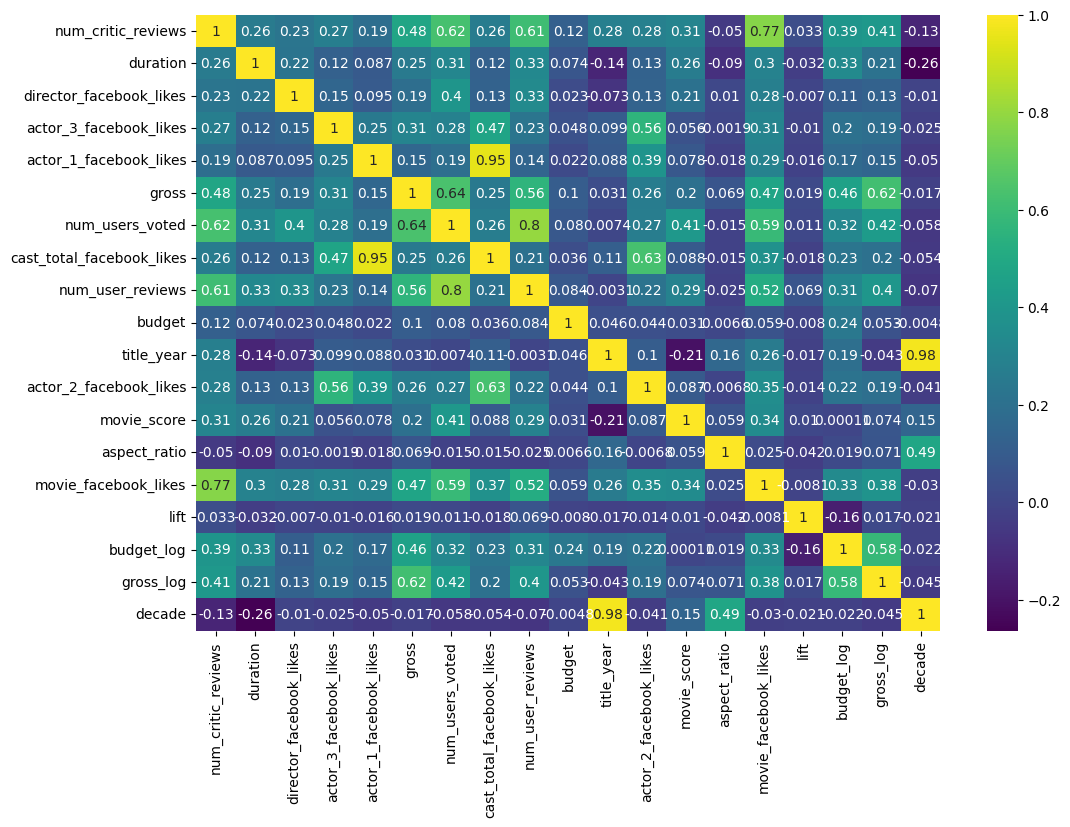

In [17]:
sns.heatmap(df.select_dtypes(np.number).corr(), cmap="viridis", annot=True)

array([[<Axes: xlabel='num_critic_reviews', ylabel='num_critic_reviews'>,
        <Axes: xlabel='duration', ylabel='num_critic_reviews'>,
        <Axes: xlabel='director_facebook_likes', ylabel='num_critic_reviews'>,
        <Axes: xlabel='actor_3_facebook_likes', ylabel='num_critic_reviews'>,
        <Axes: xlabel='actor_1_facebook_likes', ylabel='num_critic_reviews'>,
        <Axes: xlabel='gross', ylabel='num_critic_reviews'>,
        <Axes: xlabel='num_users_voted', ylabel='num_critic_reviews'>,
        <Axes: xlabel='cast_total_facebook_likes', ylabel='num_critic_reviews'>,
        <Axes: xlabel='num_user_reviews', ylabel='num_critic_reviews'>,
        <Axes: xlabel='budget', ylabel='num_critic_reviews'>,
        <Axes: xlabel='title_year', ylabel='num_critic_reviews'>,
        <Axes: xlabel='actor_2_facebook_likes', ylabel='num_critic_reviews'>,
        <Axes: xlabel='movie_score', ylabel='num_critic_reviews'>,
        <Axes: xlabel='aspect_ratio', ylabel='num_critic_reviews'>,
 

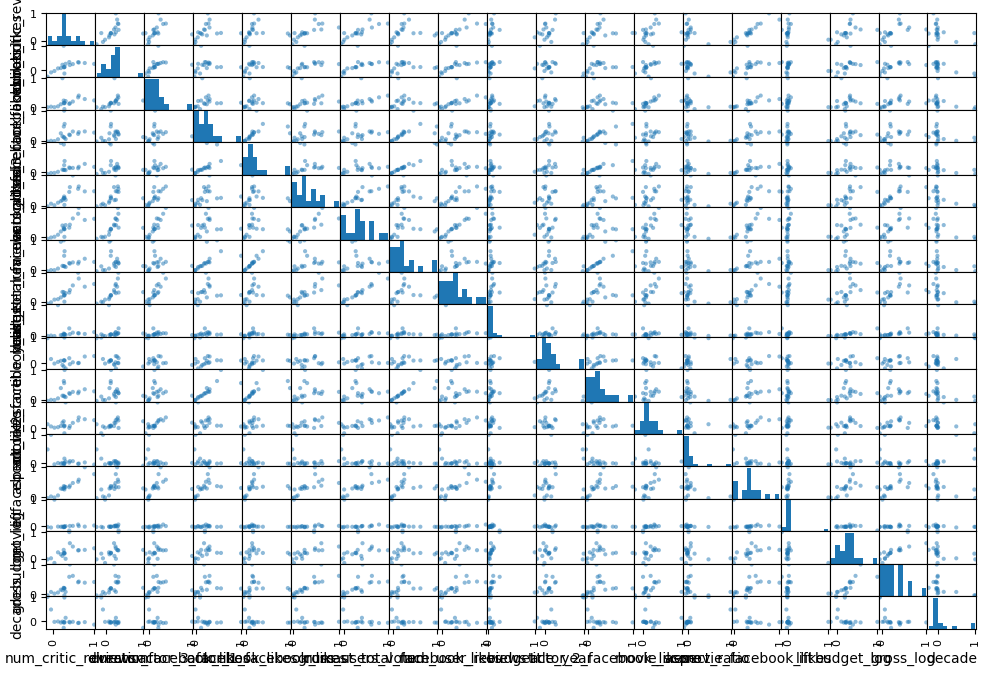

In [16]:
pd.plotting.scatter_matrix(df.select_dtypes(np.number).corr())

In [25]:
df.head(1).T

,0
color,Color
director_name,James Cameron
num_critic_reviews,723.0
duration,178.0
director_facebook_likes,NaN
actor_3_facebook_likes,855.0
actor_2_name,Joel David Moore
actor_1_facebook_likes,1000.0
gross,760505847.0
genres,Action|Adventure|Fantasy|Sci-Fi


In [39]:
cvgrp_lift = df.pivot_table(index="content_rating", columns="decade", values = ["lift"], aggfunc=["median", "count"]).fillna(0)
grp_lift.sort_values(('median', 'lift', 2010), ascending=False)

median                                              \
                    lift                                               
decade              1920       1930       1940       1950       1960   
content_rating                                                         
G               0.000000  25.029934  33.508772   0.000000   3.203140   
PG              0.000000   0.000000   0.000000   9.066667   0.400000   
PG-13           0.000000   0.000000   0.000000   0.000000  10.156545   
R               0.000000   0.000000   0.000000   0.000000  17.500000   
NC-17           0.000000   0.000000   0.000000   0.000000   0.000000   
Not Rated       0.004406   0.000000   5.632676   9.000000   0.077738   
Unrated         0.000000   5.239180   2.550000   3.667265   7.275000   
Approved        0.000000  48.694425  16.610998  23.809524   5.004433   
GP              0.000000   0.000000   0.000000   0.000000   0.000000   
M               0.000000   0.000000   0.000000   0.000000  10.154313   
Passed          7.408971   7.929504   0.000000   2.122700   0.000000   
X               0.000000   0.000000   0.000000   0.000000   0.000000   
TV-14           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-G            0.000000   0.000000   0.000000   0.000000   0.000000   
TV-MA           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-PG           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-Y            0.000000   0.000000   0.000000   0.000000   0.000000   
TV-Y7           0.000000   0.000000   0.000000   0.000000   0.000000   

                                                                   ... count  \
                                                                   ...  lift   
decade               1970      1980      1990      2000      2010  ...  1930   
content_rating                                                     ...         
G                0.580000  3.847428  1.083566  1.348138  1.328670  ...   2.0   
PG               5.101631  2.719623  1.208924  1.209935  1.153462  ...   0.0   
PG-13           30.226667  1.344237  1.104088  1.049013  1.134978  ...   0.0   
R               25.570625  3.167472  1.161683  0.772585  1.024197  ...   0.0   
NC-17           18.048300  0.000000  0.516600  0.978997  0.615431  ...   0.0   
Not Rated        0.304852  0.000000  0.000000  0.060825  0.196610  ...   0.0   
Unrated          0.000000  6.988881  0.000000  0.851173  0.005065  ...   1.0   
Approved         0.000000  0.000000  0.000000  0.000000  0.000000  ...   2.0   
GP               6.083333  0.000000  0.000000  0.000000  0.000000  ...   0.0   
M                0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
Passed           0.000000  0.000000  0.000000  0.000000  0.000000  ...   1.0   
X               10.000000  3.880751  0.000000  0.000000  0.000000  ...   0.0   
TV-14            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-G             0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-MA            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-PG            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-Y             0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-Y7            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   

                                                                       
                                                                       
decade         1940 1950  1960  1970   1980   1990   2000   2010 9990  
content_rating                                                         
G               1.0  0.0   4.0   5.0    1.0   24.0   42.0   12.0  0.0  
PG              0.0  1.0   1.0  22.0   68.0   87.0  243.0  154.0  0.0  
PG-13           0.0  0.0   1.0   1.0   27.0  194.0  682.0  426.0  0.0  
R               0.0  0.0   3.0  17.0  110.0  422.0  764.0  421.0  0.0  
NC-17           0.0  0.0   0.0   1.0    0.0    2.0    2.0    1.0  0.0  
Not Rated       2.0  3.0

In [48]:
df.groupby(["content_rating", "decade"]).agg(score = ("movie_score","mean")).reset_index().sort_values("score", ascending=False)

,content_rating,decade,score
31,PG,1940,8.600000
57,TV-G,1960,8.400000
4,G,1930,8.400000
61,TV-MA,9990,8.250000
21,Not Rated,1920,8.200000
...,...,...,...
74,Unrated,2010,5.891667
62,TV-PG,2010,5.866667
17,NC-17,1990,5.400000
58,TV-G,2000,5.000000


In [41]:
cvgrp_lift = df.pivot_table(index="content_rating", columns="decade", values = ["movie_score"], aggfunc=["mean", "count"]).fillna(0)
grp_lift.sort_values(('median', 'lift', 2010), ascending=False)

median                                              \
                    lift                                               
decade              1920       1930       1940       1950       1960   
content_rating                                                         
G               0.000000  25.029934  33.508772   0.000000   3.203140   
PG              0.000000   0.000000   0.000000   9.066667   0.400000   
PG-13           0.000000   0.000000   0.000000   0.000000  10.156545   
R               0.000000   0.000000   0.000000   0.000000  17.500000   
NC-17           0.000000   0.000000   0.000000   0.000000   0.000000   
Not Rated       0.004406   0.000000   5.632676   9.000000   0.077738   
Unrated         0.000000   5.239180   2.550000   3.667265   7.275000   
Approved        0.000000  48.694425  16.610998  23.809524   5.004433   
GP              0.000000   0.000000   0.000000   0.000000   0.000000   
M               0.000000   0.000000   0.000000   0.000000  10.154313   
Passed          7.408971   7.929504   0.000000   2.122700   0.000000   
X               0.000000   0.000000   0.000000   0.000000   0.000000   
TV-14           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-G            0.000000   0.000000   0.000000   0.000000   0.000000   
TV-MA           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-PG           0.000000   0.000000   0.000000   0.000000   0.000000   
TV-Y            0.000000   0.000000   0.000000   0.000000   0.000000   
TV-Y7           0.000000   0.000000   0.000000   0.000000   0.000000   

                                                                   ... count  \
                                                                   ...  lift   
decade               1970      1980      1990      2000      2010  ...  1930   
content_rating                                                     ...         
G                0.580000  3.847428  1.083566  1.348138  1.328670  ...   2.0   
PG               5.101631  2.719623  1.208924  1.209935  1.153462  ...   0.0   
PG-13           30.226667  1.344237  1.104088  1.049013  1.134978  ...   0.0   
R               25.570625  3.167472  1.161683  0.772585  1.024197  ...   0.0   
NC-17           18.048300  0.000000  0.516600  0.978997  0.615431  ...   0.0   
Not Rated        0.304852  0.000000  0.000000  0.060825  0.196610  ...   0.0   
Unrated          0.000000  6.988881  0.000000  0.851173  0.005065  ...   1.0   
Approved         0.000000  0.000000  0.000000  0.000000  0.000000  ...   2.0   
GP               6.083333  0.000000  0.000000  0.000000  0.000000  ...   0.0   
M                0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
Passed           0.000000  0.000000  0.000000  0.000000  0.000000  ...   1.0   
X               10.000000  3.880751  0.000000  0.000000  0.000000  ...   0.0   
TV-14            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-G             0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-MA            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-PG            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-Y             0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   
TV-Y7            0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.0   

                                                                       
                                                                       
decade         1940 1950  1960  1970   1980   1990   2000   2010 9990  
content_rating                                                         
G               1.0  0.0   4.0   5.0    1.0   24.0   42.0   12.0  0.0  
PG              0.0  1.0   1.0  22.0   68.0   87.0  243.0  154.0  0.0  
PG-13           0.0  0.0   1.0   1.0   27.0  194.0  682.0  426.0  0.0  
R               0.0  0.0   3.0  17.0  110.0  422.0  764.0  421.0  0.0  
NC-17           0.0  0.0   0.0   1.0    0.0    2.0    2.0    1.0  0.0  
Not Rated       2.0  3.0

In [36]:
df["content_rating"].value_counts()

content_rating
R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: count, dtype: int64

In [34]:
pg.pairwise_corr(df, columns =["director_facebook_likes", "num_critic_reviews", "gross_log", "budget_log", "duration", "cast_total_facebook_likes", "num_users_voted", "lift"]).sort_values("r", ascending = False)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
11,num_critic_reviews,num_users_voted,pearson,two-sided,4993,0.624943,"[0.61, 0.64]",0.000000e+00,inf,1.000000
13,gross_log,budget_log,pearson,two-sided,3891,0.583861,"[0.56, 0.6]",0.000000e+00,inf,1.000000
16,gross_log,num_users_voted,pearson,two-sided,4159,0.423520,"[0.4, 0.45]",1.050006e-180,4.434e+176,1.000000
7,num_critic_reviews,gross_log,pearson,two-sided,4156,0.408479,"[0.38, 0.43]",6.563479e-167,7.471e+162,1.000000
5,director_facebook_likes,num_users_voted,pearson,two-sided,4032,0.395971,"[0.37, 0.42]",1.812561e-151,2.911e+147,1.000000
8,num_critic_reviews,budget_log,pearson,two-sided,4520,0.393657,"[0.37, 0.42]",1.938230e-167,2.448e+163,1.000000
18,budget_log,duration,pearson,two-sided,4546,0.333588,"[0.31, 0.36]",1.386699e-118,4.22e+114,1.000000
20,budget_log,num_users_voted,pearson,two-sided,4551,0.322315,"[0.3, 0.35]",1.634341e-110,3.732e+106,1.000000
23,duration,num_users_voted,pearson,two-sided,5028,0.314765,"[0.29, 0.34]",4.819844e-116,1.179e+112,1.000000
25,cast_total_facebook_likes,num_users_voted,pearson,two-sided,5010,0.264478,"[0.24, 0.29]",5.885391e-81,1.19e+77,1.000000


In [ ]:
pg.corr(x = df_zeros["budget"], y=df_zeros["gross"])
pg.corr(x = df_zeros["movie_score"], y=df_zeros["gross"])
pg.corr(df["gross_log"], df["budget_log"])
pg.corr(df["movie_score"], df["movie_facebook_likes"])
pg.corr(df["movie_score"], df["gross_log"])

In [ ]:
pg.corr(x = df_zeros["title_year"], y=df_zeros["gross"])